Definiamo una struttura dati con le caratteristiche viste a lezione.
Questa struttura dati sarà un registro(ledger) che ammette una serie di operazioni quali:

-ADD

-UPDATE(simulata da ADD)

-DELETE(simulata da ADD)

-GET

-diamo per scontato che tale struttura ammetta operazioni matematiche(operatori) e logiche(istruzioni di controllo,operatori booleani)


Tale struttura dati dovrà essere immutabile.O meglio dovrà essere modificabile solamente attraverso operazioni di tipo "append" (quindi attraverso l'ADD).
Pertanto le operazioni "DELETE" e "UPDATE" dovranno essere simulate in qualche modo attraverso l'operazione "ADD".
In altre parole le operazioni che richiamano ai concetti di aggiornamento e cancellazione non dovranno modificare la storia del registro.

In [12]:
#INIZIALIZZAZIONE DEL LEDGER

#definiamo il registro inizializzando una semplice lista vuota
#OSS:l'ordine degli elementi di una lista in python è persistente

#ledger=[]

**REGOLE**

Costruiremo la struttura dati basandoci su una serie di regole e concetti che la caratterizzeranno.

Il registro memorizzerà una serie di record.
Ogni record è rappresentato da una coppia data da variabile e valore associato ad essa.
Ad esempio se il ledger contiene esattamente due record:
- nel primo record si ha che alla variabile "a" viene attribuito 3 come valore 
- nel secondo record si ha che alla variabile "b" viene attrbuito 5 come valore

Allora avremo banalmente ledger=[['a',3],['b',5]] 

L'operazione di **ADD** non farà altro che inserire un record nel quale viene associato per la PRIMA volta un valore ad una variabile.Qualora si volesse attribuire un nuovo valore ad una variabile già presente nel registro bisognerà effettuare un UPDATE.Prima di effetture l'inserimento l'ADD dovrà verificare che la variabile a cui si vuole attribuire il valore non sia mai stata inserita precedentemente in un record nel ledger. 
Abbiamo detto che le operazioni di UPDATE e DELETE dovranno essere implementate in maniera tale da non modificare la storia del registro.Quindi UPDATE e DELETE saranno delle operazioni che a livello sottostante non fanno altro che implementare un ADD seguendo determinate logiche.
In particolare l'**UPDATE** eseguirà un semplice append in testa al registro dopo aver verificato che la variabile di cui si vuole aggiornare il valore è già presente nel registro.
Ad esempio se si ha il ledger=[['a',3],['b',5]] e:
- si vuole aggiornare il valore della variabile 'b' a 10

Allora andrà effettuata l'operazione UPDATE('b',10).
L'operazione porterà a ledger=[['a',3],['b',5],['b',10]]

Invece se si vuole eliminare una variabile già presente nel registro bisognerà effettuare una **DELETE**.Supponiamo che si voglia elimiminare una variabile "v" già presente nel registro la DELETE non fa altro che appendere in testa alla lista il record ["v","canceled"].
Ad esempio se si ha il ledger=[['a',3],['b',5],['b',10]] e:
- si vuole eliminare la variabile b

Allora andrà effettuata l'operazione DELETE('b').

L'operazione porterà a ledger=[['a',3],['b',5],['b',10],["b","canceled"]]

NOTA:In tutte quante le operazioni che effettuano un controllo sulla presenza di una variabile bisogna considerare che se per la variabile 'v' è presente il record ["v","canceled"] allora questa è come se non fosse presente.
Siccome UPDATE e DELETE sono delle particolari ADD avremo che a un certo punto all'interno del ledger ci saranno più coppie con lo stessa variabile.Per la loro costruzione queste due operazioni possono portare a delle ambiguità sul valore attuale di certe variabili.
Dunque a fronte dell'implementazione della **GET** bisogna capire quale valore attribuire ad una variabile che è presente in più di qualche coppia all'interno del registro.
Stabiliamo che il valore attuale di una variabile è quello presente nel record inserito più recentemente.
Quindi il ledger deve in qualche modo codificare l'informazione " il record ['a',5] è l'ultimo record inserito per la variabile 'a' " questo per poter affermare che 5 è il valore attuale della variabile 'a'.
L'ordine con cui sono stati inseriti i record si rispecchia nel verso di lettura del registro.Diremo informalmente che il registro va letto temporalmente da sx a dx.Se si vuole conoscere il valore attuale di una variabile bisognerà consultare il record che si trova più a dx all'interno del registro.
La GET farà proprio questo.
Ad esempio se si ha il ledger=[['a',3],['b',5],['b',10]] e:

- si vuole conoscere il valore attuale della variabile 'b'

Allora andrà effettuata l'operazione GET('b').

L'operazione restituirà 10 in quanto nel registro il record più a destra che contiene 'b' è ['b',10].


In [39]:
#definiamo l'operazione CHECK utile all'implementazione di tutte le altre
#l'operazione CHECK prende in input una variabile e verifica se questa sia presente in almeno un record
#NOTA:se è presente il record ['v',"canceled"] significa che la variabile è stata cancellata e quindi non è più presente
#NOTA:leggo da dx a sx perché l'ultimo record associato a una variabile contiene il suo valore attuale
#     se questo valore è "canceled" la variabile è stata rimossa(quindi return False)
def check(ledger,variabile):
  for i in range(len(ledger)-1,-1,-1):
    if(ledger[i][0]==variabile):
      if(ledger[i][1]!="canceled"):
        return True
      else:
        return False
  return False

#definiamo l'operazione ADD che è una semplice append di una coppia (variabile,valore)
#la coppia (variabile,valore) verrà rappresentata come una lista di due elementi
def add(ledger,variabile,valore):
  if not(check(ledger,variabile)):
    ledger.append([str(variabile),valore])
    print("È stato inserito il record ['"+str(variabile)+"',"+str(valore)+"]")
  else:
    print("La variabile è già presente nel registro!\nPuoi modificarla attraverso l'operazione di UPDATE")


#definiamo l'operazione UPDATE che all'atto pratico implementa una ADD di un record di una variabile che è già presente nel registro
#NOTA:non si può inserire il valore "canceled" per una variabile in quanto ciò genererebbe un ambiguità con l'operazione DELETE
def update(ledger,variabile,valore):
  if(check(ledger,variabile)):
    ledger.append([variabile,valore])
    print(f"È stato aggiornato il record ['{variabile}',{valore}]")
  else:
    print("La variabile non è presente nel registro!\nPuoi inserirla attraverso l'operazione di ADD")


#definiamo l'operazione GET che prende in input il nome di una variabile e qualora sia presente ne restituisce l'ultimo valore associatole
def get(ledger,variabile):
  if(check(ledger,variabile)):
    for i in range(len(ledger)-1,-1,-1):
      if(ledger[i][0]==variabile):
        return ledger[i][1]
  print("La variabile non è presente nel registro")


#definiamo l'operazione DELETE che all'atto pratico effettua l'add di un record assegnando alla variaibile un valore speciale 
def delete(ledger,variabile):
  if(check(ledger,variabile)):
    ledger.append([variabile,"canceled"])
    print("la variabile "+str(variabile)+" è stata eliminata dal registro!")
  else:
    print("la variabile "+str(variabile)+" non è presente nel registro!")


#la funzione showLedger restituisce il registro(lista di coppie) in un formato più leggibile
def showLedger(ledger):
  print("LEDGER:")
  for i in range(len(ledger)):
    print(ledger[i][0]+":"+str(ledger[i][1]))


**Reversibilità delle operazioni**

In questa struttura dati l'eliminazione di un record è un'operazione reversibile. Cioè una volta effettuata si può risalire alla configurazione precedente precedente semplicemente osservando lo storia dei record memorizzati nel registro.

Consideriamo il caso in cui un sistema informativo memorizza i salari dei dipendenti di una società.
Supponiamo quindi di voler eliminare la matricola di un dipendente licenziato poiché non rappresenta più un'informazione utile per la società.
Analogamente supponiamo di voler aggiornare il salario di un dipendente che ha
ricevuto un aumento o una riduzione.
Queste operazioni sono supportate sia dal ledger implementato e descritto finora che da una semplice base di dati relazionale con le operazioni CRUD.

Creiamo allora una base di dati relazionale usando il linguaggio di interrogazione mysql

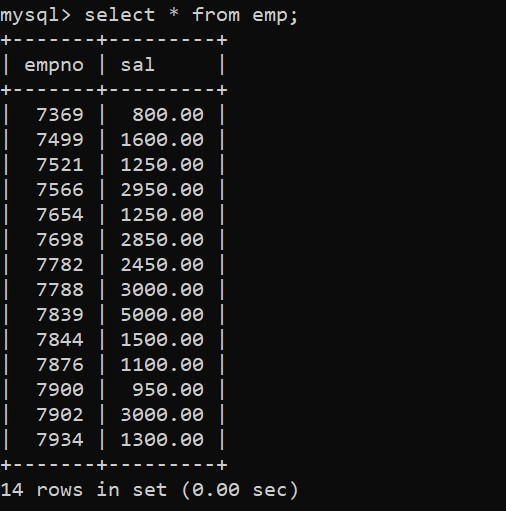

Abbiamo quindi una serie di righe che indicano il salario per ogni utente identificato univocamente da una matricola(attributo "empno").
Per eliminare una riga effettuiamo un'operazione di DELETE:

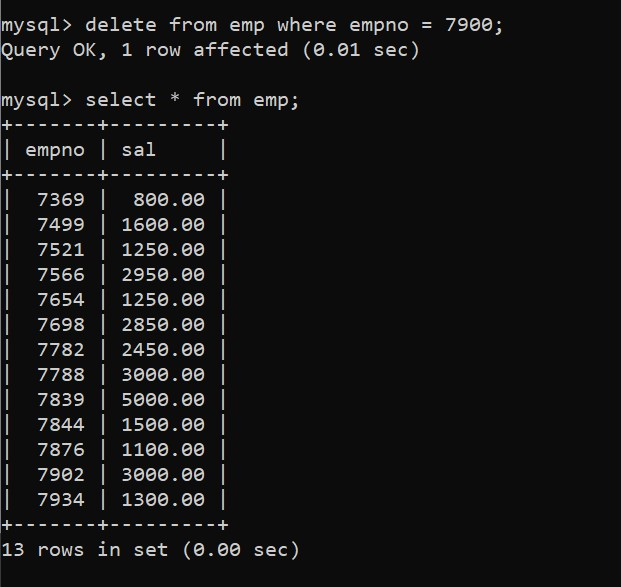

La DELETE in mysql porta all'eliminazione definitiva dei valori di un record.
Quindi non avremmo modo di recuperare la matricola eliminata a meno che non si facesse una copia di backup della tabella.La creazione di una tabella di backup deve però essere effettuata dal programmatore e la sua presenza introduce ridondanza e altre problematiche.


Visualizziamo lo stesso scenario nella struttura dati implementata e descritta sopra.

In [40]:
#inizializzo un ledger

ledger1=[]

In [41]:
#inseriamo i record come nella base di dati

add(ledger1,'7369',800.0)
add(ledger1,'7499',1600.0)
add(ledger1,'7521',1250.0)
add(ledger1,'7566',2950.0)
add(ledger1,'7654',1250.0)
add(ledger1,'7698',2850.0)
add(ledger1,'7782',2450.0)
add(ledger1,'7788',3000.0)
add(ledger1,'7839',5000.0)
add(ledger1,'7844',1500.0)
add(ledger1,'7876',1100.0)
add(ledger1,'7900',950.0)
add(ledger1,'7902',3000.0)
add(ledger1,'7934',1300.0)

È stato inserito il record ['7369',800.0]
È stato inserito il record ['7499',1600.0]
È stato inserito il record ['7521',1250.0]
È stato inserito il record ['7566',2950.0]
È stato inserito il record ['7654',1250.0]
È stato inserito il record ['7698',2850.0]
È stato inserito il record ['7782',2450.0]
È stato inserito il record ['7788',3000.0]
È stato inserito il record ['7839',5000.0]
È stato inserito il record ['7844',1500.0]
È stato inserito il record ['7876',1100.0]
È stato inserito il record ['7900',950.0]
È stato inserito il record ['7902',3000.0]
È stato inserito il record ['7934',1300.0]


In [42]:
showLedger(ledger1)

LEDGER:
7369:800.0
7499:1600.0
7521:1250.0
7566:2950.0
7654:1250.0
7698:2850.0
7782:2450.0
7788:3000.0
7839:5000.0
7844:1500.0
7876:1100.0
7900:950.0
7902:3000.0
7934:1300.0


Ora eliminiamo lo stesso record della base di dati mysql utilizzando la DELETE.

OSS.:il registro definito è una struttura append-only.Pertanto verrà effettuato l'inserimento di un record speciale che contrassegna la matricola come eliminata.

In [44]:
#eliminiamo i record relativi alla matricola(variabile) "7900" 
delete(ledger1,"7900")
showLedger(ledger1)

la variabile 7900 è stata eliminata dal registro!
LEDGER:
7369:800.0
7499:1600.0
7521:1250.0
7566:2950.0
7654:1250.0
7698:2850.0
7782:2450.0
7788:3000.0
7839:5000.0
7844:1500.0
7876:1100.0
7900:950.0
7902:3000.0
7934:1300.0
7900:canceled


In [45]:
get(ledger1,"7900")

La variabile non è presente nel registro


I record relativi all'impiegato "7900" vengono considerati come non validi in quanto l'ultimo inserito è [7900,"canceled"] che contrassegna la matricola come eliminata.
Qualora si volesse recuperare una matricola eliminata questo ledger ci consente di farlo grazie alla sua proprietà di "append-only"

**Gestione della concorrenza**
Supponiamo che due utenti effettuino operazioni che vanno in conflitto.Ad esempio potrebbe accadere che entrambi contemporaneamente vogliano aggiornare una stessa variabile attribuendole valori diversi.
Nel caso delle basi di dati mysql sarebbe piuttosto complicato stabilire quali dei due utenti ha ragione in quanto la concorrenza viene gestita a livello fisico.
Quindi le soluzioni per questo problema sono varie:
- accesso in mutua esclusione alla risorsa(aspetto più fisico che applicativo)
- esclusione di uno dei due utenti secondo un certo criterio(ad esempio un  
  utente ha maggiori diritti di effettuare operazioni rispetto ad un altro)

Nel caso del ledger invece il problema può essere demandato ad un livello più applicativo implementando il concetto di fork.In un registro una fork o diramazione si verifica quando due o più utenti vanno in conflitto sul valore di una variabile.

In [161]:
#reinizializzo un nuovo ledger

ledger2=[]

In [162]:
add(ledger2,'a',2)
add(ledger2,'b',4)
add(ledger2,'a',3)
add(ledger2,'c',5)
delete(ledger2,'a')

È stato inserito il record ['a',2]
È stato inserito il record ['b',4]
La variabile è già presente nel registro!
Puoi modificarla attraverso l'operazione di UPDATE
È stato inserito il record ['c',5]
la variabile a è stata eliminata dal registro!


In [163]:
showLedger(ledger2)

LEDGER:
a:2
b:4
c:5
a:canceled


**Fork per 2 utenti in conflitto su UPDATE**

Consideriamo per semplicità il seguente scenario:

Abbiamo a un certo punto ledger2=[['a', 2], ['b', 4], ['c', 5], ['a', 'canceled']]
Supponiamo che due utenti Alice e Bob vogliano effettuare contemporaneamente l'operazione UPDATE sulla variabile "c".
-Alice effettua update(ledger2,"c",20)
-Bob effettua update(ledger2,"c",777)

Osserviamo che le due operazioni vanno in conflitto.La soluzione della fork consiste nel creare una diramazione da un certo punto della blockchain in poi.
A livello pratico la fork può essere implementata in diversi modi.
Un modo banale applicabile al caso specifico dell'esempio(cioè due utenti che vogliono effettuare l'update della stessa variabile) è il seguente:

-fork2update(ledger2,variabile,valAlice,valBob)
Dove valAlice e valBob sono due valori che Alice e Bob vogliono attribuire alla stessa variabile con UPDATE.

Nell'esempio avremo che fork2update(ledger2,"c",20,777) ritorna:

ledger2=[[['a', 2], ['b', 4], ['c', 5], ['a', 'canceled'],['c',20]]

ledger2_F1=[[['a', 2], ['b', 4], ['c', 5], ['a', 'canceled'],['c',777]]

Cioè la fork2update costruisce un secondo ledger identico al precedente tranne che per il record relativo per cui i due utenti erano andati in conflitto.

In [164]:
#definizione della fork per il conflitto di due utenti che vogliono effettuare update su una stessa variabile
def fork2update(ledger,variabile,valAlice,valBob):
#  if(valAlice==valBob): #se i due valori sono uguali viene eseguito un unico update poiché i due utenti non vanno in conflitto
#    update(ledger,valAlice)
#  else:
  global ledger2_F1 #viene creato un secondo ledger
  ledger2_F1=ledger[:]  #è identico al precedente prima del conflitto tra i due utenti
  update(ledger,variabile,valAlice)
  update(ledger2_F1,variabile,valBob)

In [165]:
fork2update(ledger2,'c',20,777)

È stato aggiornato il record ['c',20]
È stato aggiornato il record ['c',777]


In [166]:
showLedger(ledger2)

LEDGER:
a:2
b:4
c:5
a:canceled
c:20


In [167]:
showLedger(ledger2_F1)

LEDGER:
a:2
b:4
c:5
a:canceled
c:777
